KNN Example

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("loan.csv")

In [4]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
dataset['Gender']=dataset['Gender'].fillna(dataset['Gender'].mode().values[0])
dataset['Married']=dataset['Married'].fillna(dataset['Married'].mode().values[0])
dataset['Dependents']=dataset['Dependents'].fillna(dataset['Dependents'].mode().values[0])
dataset['Self_Employed']=dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode().values[0])
dataset['LoanAmount']=dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean())
dataset['Loan_Amount_Term']=dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode().values[0])
dataset['Credit_History']=dataset['Credit_History'].fillna(dataset['Credit_History'].mode().values[0])

In [7]:
dataset.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [10]:
dataset.shape

(614, 13)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<AxesSubplot:xlabel='count', ylabel='Gender'>

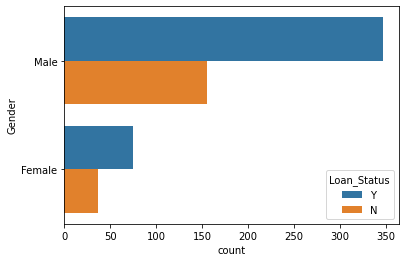

In [12]:
sns.countplot(y='Gender',hue='Loan_Status',data=dataset)

In [13]:
dataset['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Married'>

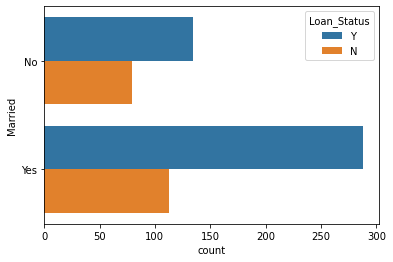

In [14]:
sns.countplot(y='Married',hue='Loan_Status',data=dataset)

In [16]:
dataset['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Education'>

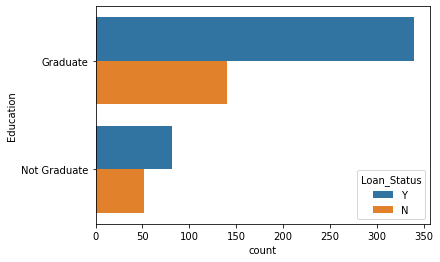

In [17]:
sns.countplot(y='Education',hue='Loan_Status',data=dataset)

In [22]:
dataset['Gender'].unique()


array(['Male', 'Female'], dtype=object)

In [23]:
dataset['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [24]:
dataset['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [25]:
dataset['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [26]:
dataset['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [27]:
dataset['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [28]:
dataset['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [29]:
gender={"Female":0,"Male":1}
yes_no={"No":0,"Yes":1}
dependents={'0':0, '1':1, '2':2, '3+':3}
education={'Graduate':1, 'Not Graduate':0}
properti={'Urban':2, 'Rural':1, 'Semiurban':0}
output={'Y':1, 'N':0}
dataset['Gender']=dataset['Gender'].replace(gender)
dataset['Married']=dataset['Married'].replace(yes_no)
dataset['Dependents']=dataset['Dependents'].replace(dependents)
dataset['Education']=dataset['Education'].replace(education)
dataset['Self_Employed']=dataset['Self_Employed'].replace(yes_no)
dataset['Property_Area']=dataset['Property_Area'].replace(properti)
dataset['Loan_Status']=dataset['Loan_Status'].replace(output)

In [30]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [41]:
dataset=dataset.drop('Loan_ID',axis=1)


In [42]:
x=dataset.drop('Loan_Status',1)
y=dataset.Loan_Status

C:\Users\mtlah\AppData\Local\Temp\ipykernel_22916\1732475374.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=dataset.drop('Loan_Status',1)


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(x,y,test_size=0.25,random_state=38,stratify=y)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn=KNeighborsClassifier(n_neighbors=5)

In [46]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [47]:
prediction_knn=knn.predict(X_test)

In [48]:
print("Prediction for test set: {}".format(prediction_knn))

Prediction for test set: [1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1]


In [49]:
a=pd.DataFrame({'Actual values':Y_test,'Predicted values':prediction_knn})
a.head()

,Actual values,Predicted values
263,1,1
395,1,1
226,0,0
413,1,1
403,1,0


In [50]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
matrix=confusion_matrix(Y_test,prediction_knn)

              precision    recall  f1-score   support

           0       0.39      0.19      0.25        48
           1       0.70      0.87      0.78       106

    accuracy                           0.66       154
   macro avg       0.55      0.53      0.51       154
weighted avg       0.61      0.66      0.61       154



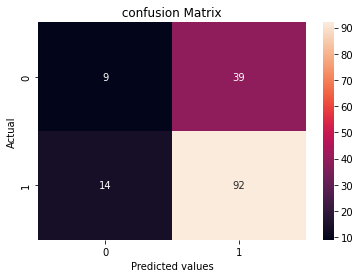

In [52]:
sns.heatmap(matrix,annot=True,fmt="d")
plt.title(' confusion Matrix ')
plt.xlabel('Predicted values')
plt.ylabel('Actual')
print(classification_report(Y_test,prediction_knn))